# Python Timeseries

In [1]:
def evaluate(reg, data, n=50, **kwargs):
    yhat = reg.predict(start=len(data), end=len(data) + n, **kwargs)
    plt.plot(data)
    plt.plot(np.arange(0, len(yhat), 1) + len(data), yhat, linestyle="dotted")

In [2]:
from random import random, seed

import numpy as np

seed(17)
data = np.array([x + random() for x in range(1, 100)])

## Autoregression

The AutoRegression (AR) method predicts the subsequent value in a sequence using a linear combination of previous observations.

The method is best suited for single-variable time series that lack trend and seasonal components.

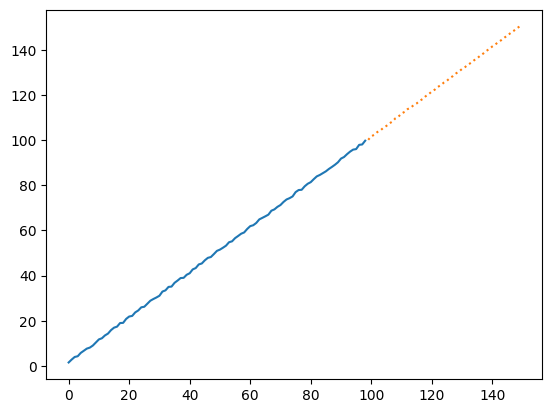

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(data, lags=20)
evaluate(model.fit(), data)

## Moving Average (MA)

This method predicts the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

It is different from calculating the moving average of the time series.

The method is suitable for univariante time series without trend and seasonal components.

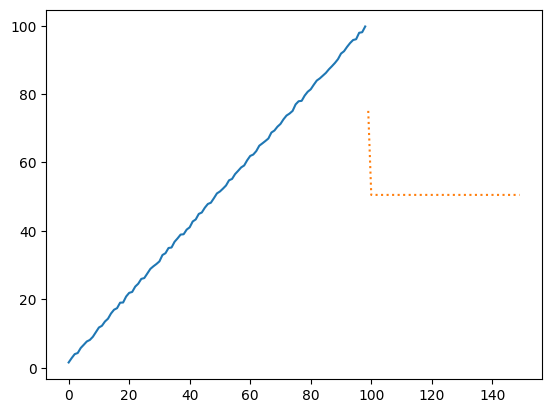

In [4]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(0, 0, 1))
evaluate(model.fit(), data)

## Autoregressive Moving Average (ARMA)

This method predicts the next step in the sequence based on a linear combination of both past observations and past residual errorr.

The method combines both Autoregression (AR) and Moving Average (MA) models.

This method is suitable for univariante time series without trend and seasonal components.

/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


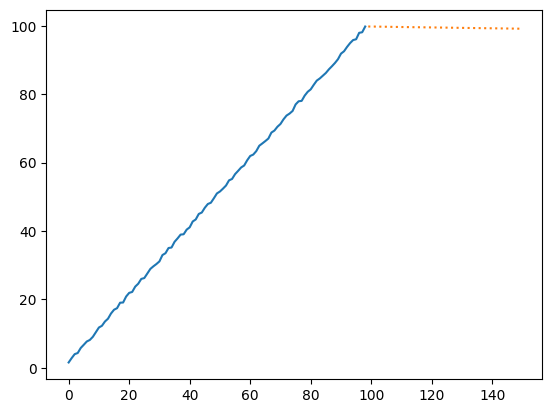

In [5]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(2, 0, 1))
evaluate(model.fit(), data)

## Autoregressive Integrated Moving Average (ARIMA)

This method predicts the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

The method integrates the principles of Autoregresion (AR) and Moving Average (MA) models as well as differencing pre-processing step of the sequence to make the sequence stationary, called Integration (i).

The ARIMA approach is optimal for single-variable time series that exhibit a trend but lack seasonal variations.

/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


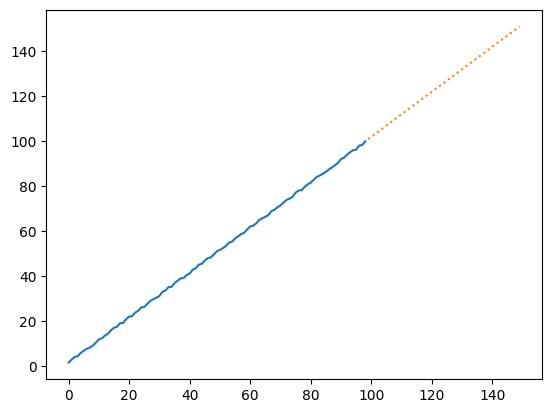

In [6]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1, 1, 1))
evaluate(model.fit(), data, n=50, typ="levels")

## Seasonal Autoregressive Integrated Moving-Average (SARIMA)

This method models the next step in the sequence based on a linear blend of differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

SARIMA enhandes the ARIMA model with the ability to perform the same autoregression, differencing and moving average modeling at the seasonal level.

The method is suitable for univariante time series with trend and/or seasonal components.

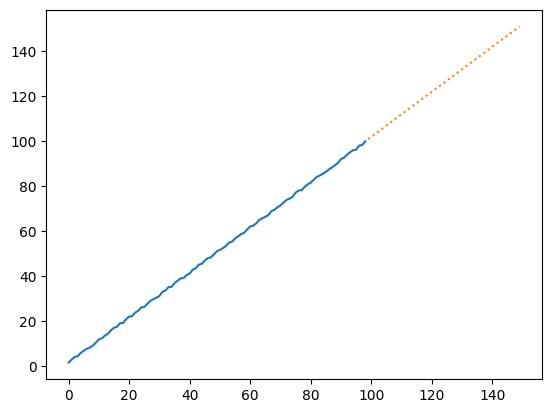

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
evaluate(model.fit(disp=False), data)

## Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

An extension of the SARIMA model that also includes the modeling of exogenous variables.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.



In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

seed(17)
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]

# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(len(data1), len(data1), exog=[exog2])
print(yhat)

[100.40657756]


## Vector Autoregression (VAR)

The method models the next step in each time series using an AR model approach. Essentially, it extends the AR model to cater to multiple parallel time series, e.g. multivariante time series.

The method is suitable for multivariante time series without trend and seasonal components.



In [9]:
from statsmodels.tsa.vector_ar.var_model import VAR

seed(17)
data = []
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VAR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.endog, steps=1)
print(yhat)

[[100.45951671 100.91200678]]


## Vector Autoregression Moving-Average (VARMA)

This method models the upcoming value in multiple time series by utilising the ARIMA model approach. It is the generalization of ARIMA to multiple parallel time series, e.g. multivariante time series.

The method is suitable for multivariate time series without trend and seasonal components.


In [10]:
from statsmodels.tsa.statespace.varmax import VARMAX

seed(17)
data = []
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)

model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.forecast()
yhat

/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([[0.57097391, 1.1170929 ]])

## Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) extends the capabilities of the VARMA model which also includes the modelling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables, also called covariates and can be thought of as parallel input sequences that align with the time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [11]:
from statsmodels.tsa.statespace.varmax import VARMAX

seed(17)
data = []
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
yhat

/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


array([[0.53171912, 0.97254676]])

## Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

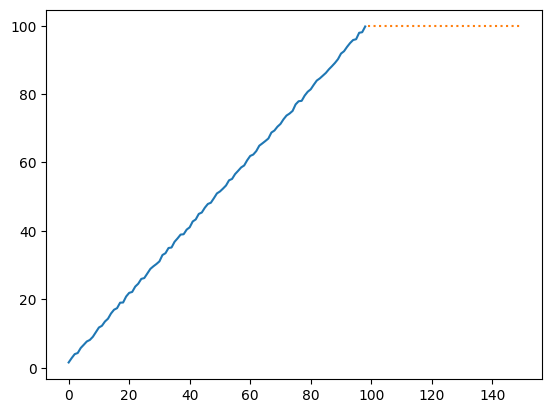

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

seed(17)
data = [x + random() for x in range(1, 100)]
model = SimpleExpSmoothing(data)
evaluate(model.fit(), data)